In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
!pip install dtreeviz
!apt-get install graphviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/My Drive/220617_ai_crawling_3Y_animal_maskrcnn_hsv_view_per.xlsx')
pd.set_option('display.max_colwidth',1)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 50)
df = pd.DataFrame(df)

In [ ]:
df.head()

,Unnamed: 0,no,video_id,thumbnail,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,...,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V,view_per_day
0,0,0,4__iv9Bk4bE,https://i.ytimg.com/vi/4__iv9Bk4bE/mqdefault.jpg,0,0,0,NaN,0,0,...,0,NaN,0,0,0,NaN,198.02,243.77,167.45,4040.79
1,1,1,vvVcn-9hj7c,https://i.ytimg.com/vi/vvVcn-9hj7c/mqdefault.jpg,0,0,0,NaN,1,97,...,0,NaN,0,0,0,NaN,38.24,41.82,27.66,5767.64
2,2,2,3srBkXqqbwg,https://i.ytimg.com/vi/3srBkXqqbwg/mqdefault.jpg,0,0,0,NaN,0,0,...,0,NaN,0,0,0,NaN,40.04,131.27,110.37,3342.50
3,3,3,9iXSnic5c5c,https://i.ytimg.com/vi/9iXSnic5c5c/mqdefault.jpg,0,0,0,NaN,0,0,...,0,NaN,0,0,0,NaN,42.54,158.69,62.16,1789.13
4,4,4,9gj2sc9qeWo,https://i.ytimg.com/vi/9gj2sc9qeWo/mqdefault.jpg,0,0,0,NaN,0,0,...,0,NaN,0,0,0,NaN,184.90,46.47,111.50,5783.80


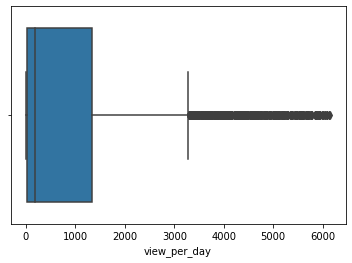

In [ ]:
#구간별로 클래스를 분할할 view_per_day 시각화

sns.boxplot(x = df['view_per_day'])

(array([4118.,  579.,  417.,  306.,  263.,  180.,  163.,  132.,   95.,
          91.]),
 array([   0.   ,  615.322, 1230.644, 1845.966, 2461.288, 3076.61 ,
        3691.932, 4307.254, 4922.576, 5537.898, 6153.22 ]),
 <a list of 10 Patch objects>)

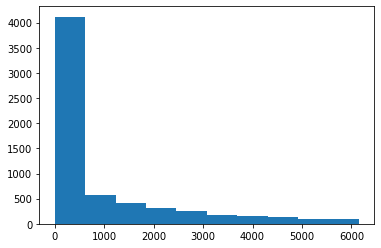

In [ ]:
#구간별로 클래스를 분할할 view_per_day 시각화

plt.hist(x = df['view_per_day'])

In [ ]:
#view_per_day를 동일한 개수로 3분할

df['view_class'] = pd.qcut(df['view_per_day'], 3, labels=['1', '2', '3'])

In [ ]:
df[['view_per_day', 'view_class']].head()

,view_per_day,view_class
0,4040.79,3
1,5767.64,3
2,3342.50,3
3,1789.13,3
4,5783.80,3


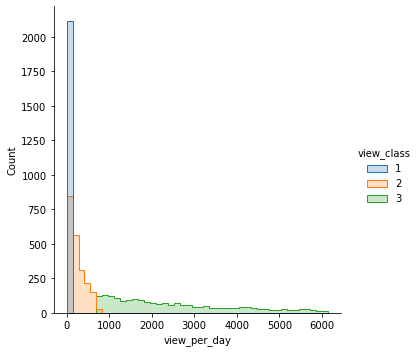

In [ ]:
#분할 후 view_per_day 시각화

sns.displot(df, x='view_per_day', hue='view_class', element='step')

In [ ]:
df.to_excel('/content/drive/My Drive/animal_to_split.xlsx')

In [ ]:
#피쳐로 사용할 열을 제외한 나머지 drop, nan을 0으로 치환

X_df = df.drop(columns=['view_per_day', 'view_class'], axis=1)
X_df = X_df.drop(X_df.columns[0:4], axis=1)
X_df = X_df.fillna(0)
X_df

,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,object_h1,object_wh1,object_id2,object_w2,...,object_w79,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V
0,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,198.02,243.77,167.45
1,0,0,0,0.0,1,97,171,16587.000000,0,0,...,0,0,0.0,0,0,0,0.0,38.24,41.82,27.66
2,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,40.04,131.27,110.37
3,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,42.54,158.69,62.16
4,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,184.90,46.47,111.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,138.72,112.07,101.92
6340,0,0,0,0.0,7,109,154,363.714286,0,0,...,0,0,0.0,0,0,0,0.0,104.56,145.52,158.97
6341,0,0,0,0.0,0,0,0,0.000000,0,0,...,0,0,0.0,0,0,0,0.0,64.64,40.89,157.44
6342,0,0,0,0.0,1,24,55,1320.000000,0,0,...,0,0,0.0,0,0,0,0.0,110.80,94.77,83.19


In [ ]:
# X에 각 피쳐 맵핑
X = X_df
# y에 view맵핑
y = df['view_class']

In [ ]:
X.head()

,object_id0,object_w0,object_h0,object_wh0,object_id1,object_w1,object_h1,object_wh1,object_id2,object_w2,...,object_w79,object_h79,object_wh79,object_id80,object_w80,object_h80,object_wh80,H,S,V
0,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,198.02,243.77,167.45
1,0,0,0,0.0,1,97,171,16587.0,0,0,...,0,0,0.0,0,0,0,0.0,38.24,41.82,27.66
2,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,40.04,131.27,110.37
3,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,42.54,158.69,62.16
4,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,184.90,46.47,111.50


In [ ]:
y

0       3
1       3
2       3
3       3
4       3
       ..
6339    2
6340    3
6341    2
6342    1
6343    1
Name: view_class, Length: 6344, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((4440, 327), (1904, 327))

In [ ]:
params = {
'n_estimators' : [100, 200, 300, 400, 500],
'max_depth' : [4, 6, 8, 10, 12],
'min_samples_leaf': [8, 12, 18],
'min_samples_split' : [8, 16, 20] }


In [ ]:
#GridSearchCV를 사용하여 RF 최적의 파라미터 찾기
classifier_rf = RandomForestClassifier()
grid_cv = GridSearchCV(classifier_rf,param_grid=params, cv = 10, n_jobs=-1)

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 400}
최적 예측 정확도: 0.4252


In [ ]:
#최적 파라미터를 적용하여 모델 학습

classifier_rf = RandomForestClassifier(random_state=0, max_depth = 12, min_samples_leaf = 8, min_samples_split= 20, n_estimators = 400 ,n_jobs=-1)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20,
                       n_estimators=400, n_jobs=-1, random_state=0)

In [ ]:
y_pred = classifier_rf.predict(X_test)
y_pred

array(['2', '2', '3', ..., '2', '1', '3'], dtype=object)

In [ ]:
#모델 성능 측정

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.57      0.49       640
           2       0.41      0.22      0.29       654
           3       0.45      0.52      0.49       610

    accuracy                           0.43      1904
   macro avg       0.43      0.44      0.42      1904
weighted avg       0.43      0.43      0.42      1904



In [ ]:
#모델 성능 측정

print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

예측 정확도: 0.4349


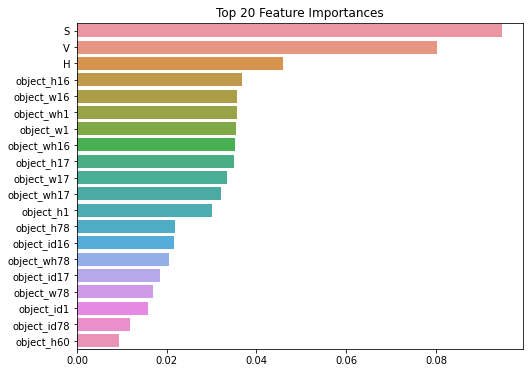

In [ ]:
#중요도 시각화

ftr_importances_values = classifier_rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

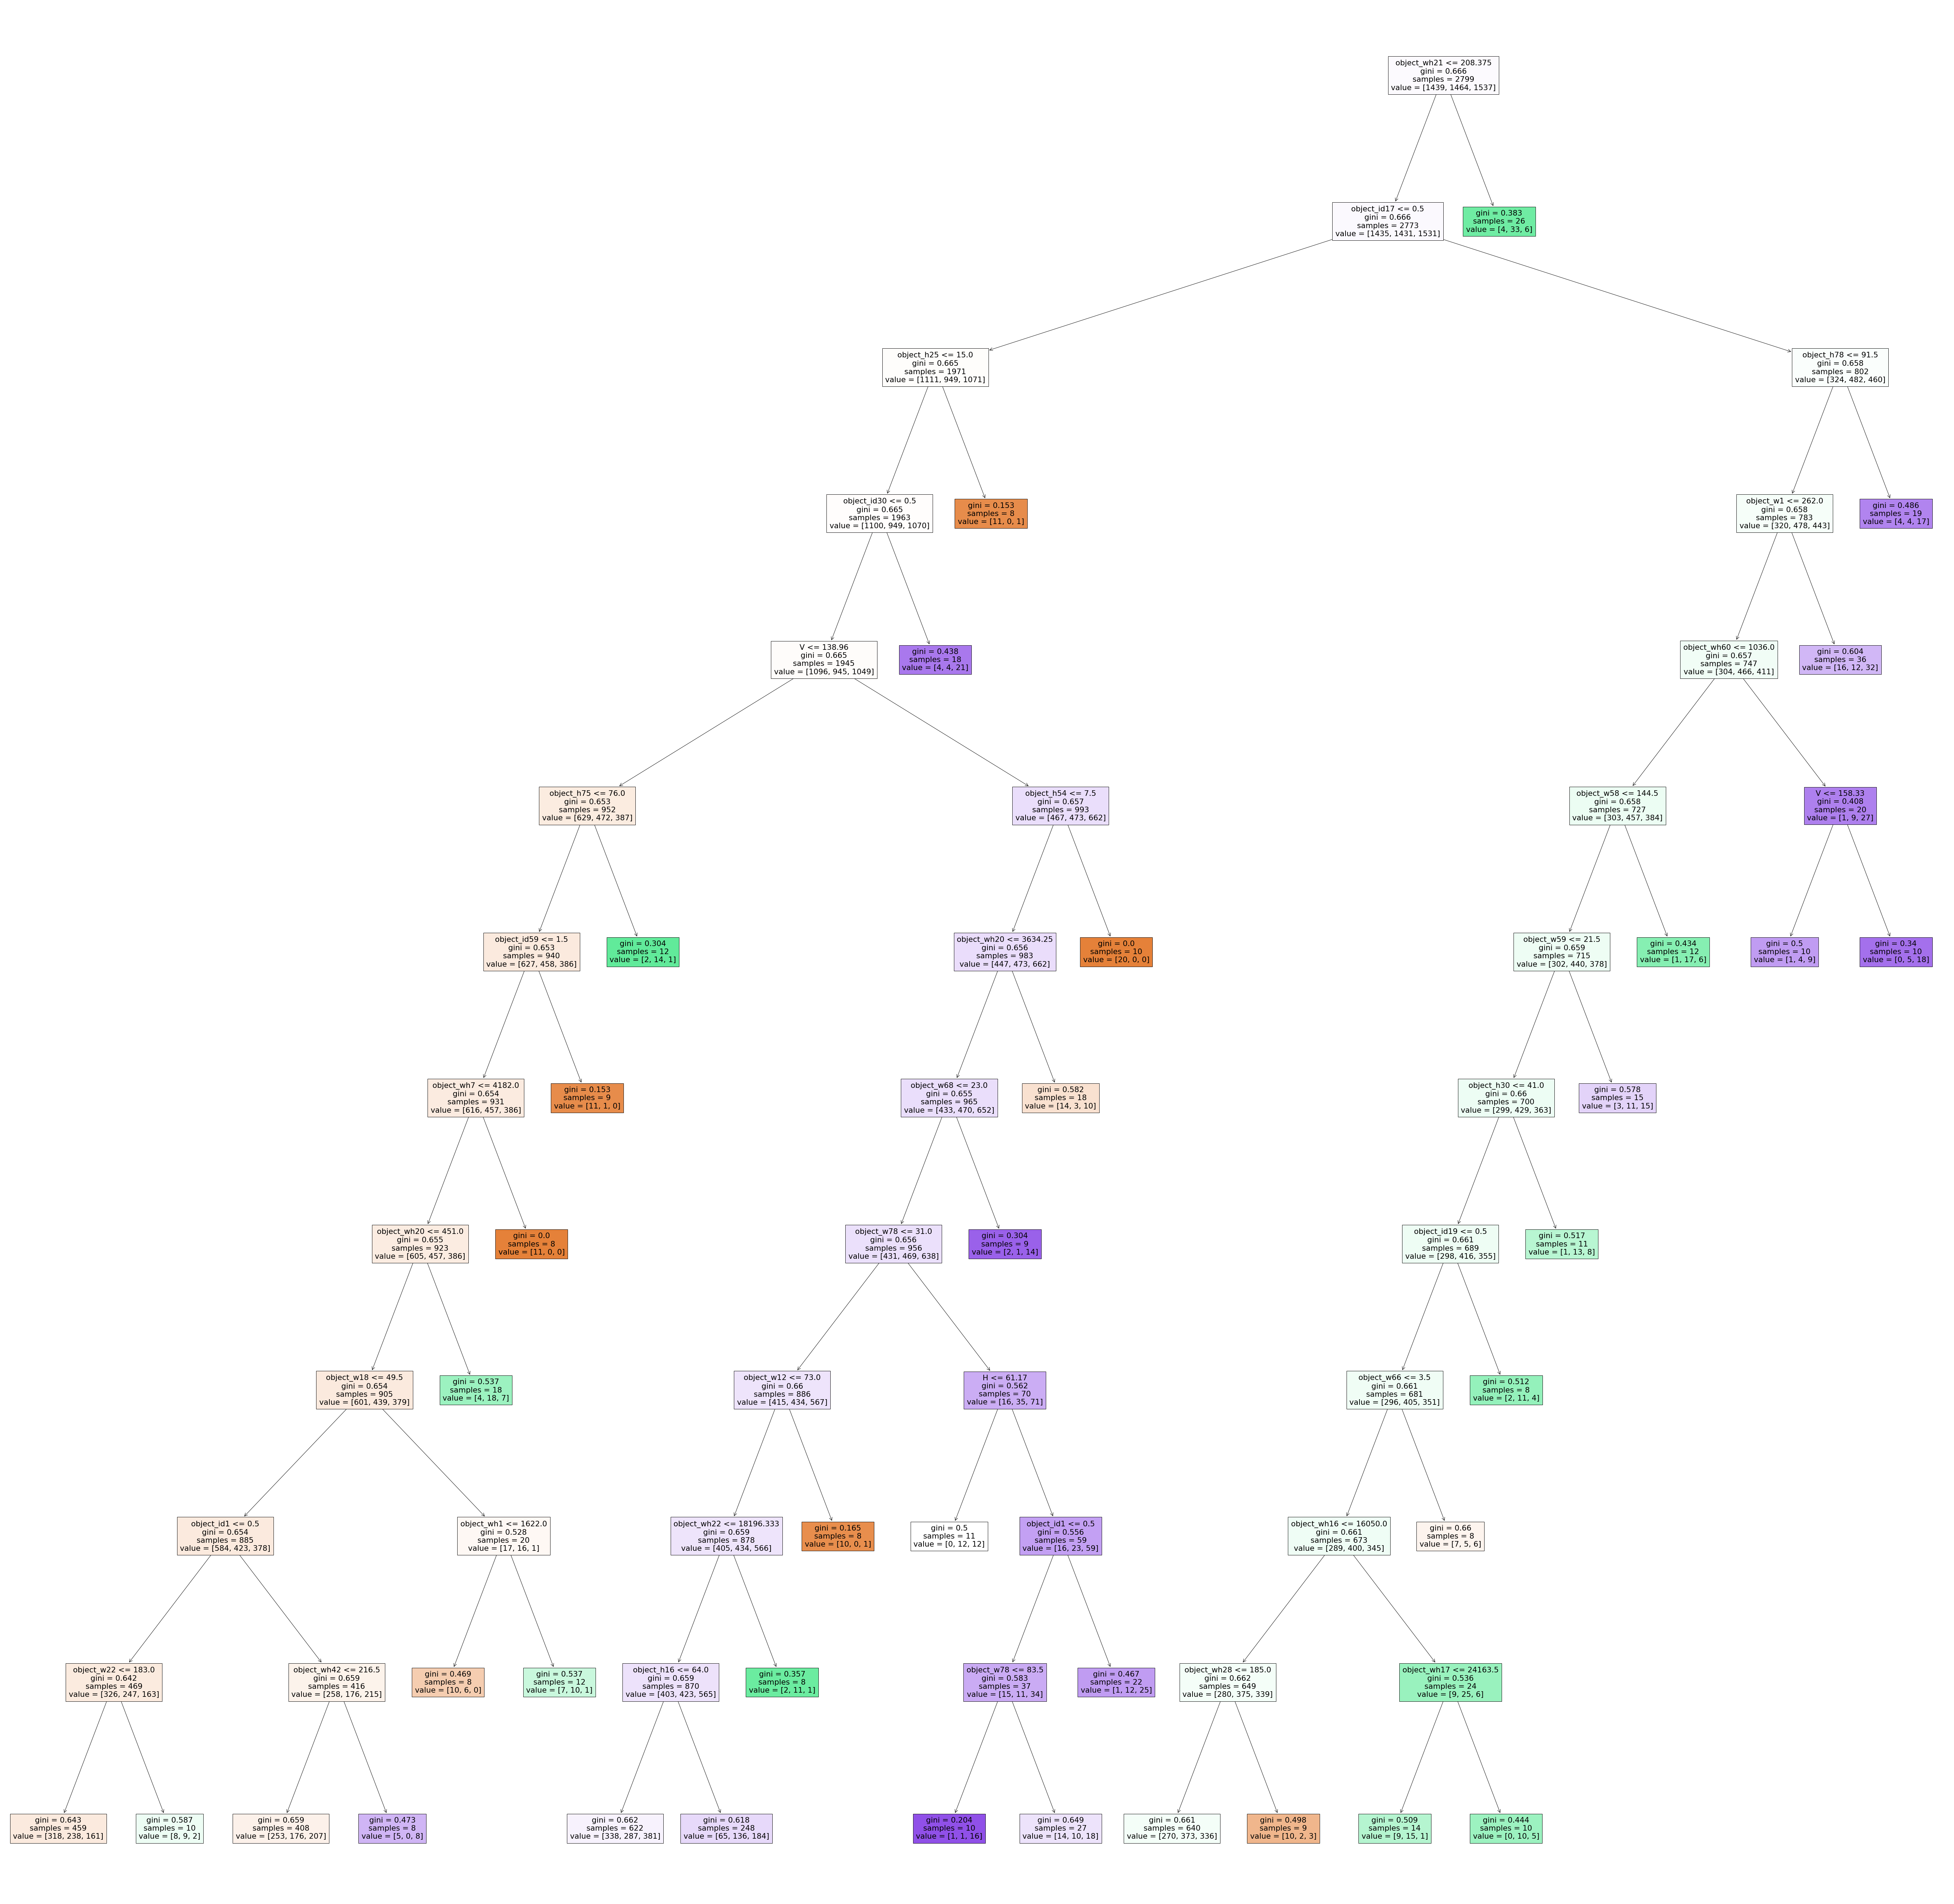

In [ ]:
#랜덤포레스트 트리 시각화

from sklearn import tree
plt.figure(figsize=(100,100))
_ = tree.plot_tree(classifier_rf.estimators_[0], feature_names=X_train.columns, filled=True)